In [1]:
# basic
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
# plot
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style("whitegrid")
sns.axes_style("whitegrid")
plt.style.use('seaborn-whitegrid')
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
#df = pd.read_csv('../../outputs/classification/node/metrics/cross_validation.csv')
df = pd.read_csv('../../outputs/classification/node/exp_ii/metrics/cross_validation.csv')
df['model_name'] = df['model'].apply(lambda x: x.split('_')[0])
df.head()

,model,accuracy,mcc,precision,recall,tn,fp,fn,tp,f1,fold,model_name
0,gat_1,0.89,0.77,0.87,0.86,149,15,16,101,0.87,1,gat
1,cheb_1,1.00,1.00,1.00,1.00,164,0,0,117,1.00,1,cheb
2,gcn_1,0.93,0.85,0.87,0.97,147,17,4,113,0.91,1,gcn
3,sage_1,0.94,0.88,0.98,0.88,162,2,14,103,0.93,1,sage
4,gat_2,0.87,0.75,0.76,0.95,145,31,5,100,0.85,2,gat


In [4]:
# mean
df.pivot_table(index='model_name', 
               values=['accuracy', 'mcc', 'precision', 'recall', 'f1'],
               aggfunc='mean').reset_index().round(2)

,model_name,accuracy,f1,mcc,precision,recall
0,cheb,1.00,0.99,0.99,1.00,0.99
1,gat,0.90,0.88,0.80,0.87,0.90
2,gcn,0.95,0.94,0.90,0.95,0.93
3,sage,0.94,0.92,0.88,0.94,0.92


In [5]:
# std
df.pivot_table(index='model_name', 
               values=['accuracy', 'mcc', 'precision', 'recall', 'f1'],
               aggfunc='std').reset_index().round(2)

,model_name,accuracy,f1,mcc,precision,recall
0,cheb,0.01,0.01,0.02,0.00,0.02
1,gat,0.02,0.03,0.04,0.05,0.04
2,gcn,0.01,0.02,0.03,0.04,0.03
3,sage,0.03,0.03,0.05,0.07,0.06


In [6]:
df.pivot_table(index='model_name', 
               values=['accuracy', 'mcc', 'precision', 'recall', 'f1'],
               aggfunc='mean').reset_index().round(2).to_csv('mean_bc_node.csv', index=False)

In [7]:
df_model = df.query(f" model_name == 'gcn' and fold == 1 ")
df_model.head()

,model,accuracy,mcc,precision,recall,tn,fp,fn,tp,f1,fold,model_name
2,gcn_1,0.93,0.85,0.87,0.97,147,17,4,113,0.91,1,gcn


In [8]:
df.pivot_table(index='model_name', 
               values=['accuracy', 'mcc', 'precision', 'recall', 'f1'],
               aggfunc='mean').reset_index().round(2)

,model_name,accuracy,f1,mcc,precision,recall
0,cheb,1.00,0.99,0.99,1.00,0.99
1,gat,0.90,0.88,0.80,0.87,0.90
2,gcn,0.95,0.94,0.90,0.95,0.93
3,sage,0.94,0.92,0.88,0.94,0.92


In [9]:
df.pivot_table(index='model_name', 
               values=['accuracy', 'mcc', 'precision', 'recall', 'f1'],
               aggfunc='mean').reset_index().round(2).to_csv('best_result_bn_nc.csv', index=False)

In [10]:
df_model_cm = df.pivot_table(index=['model_name'], values=['tn', 'fp', 'fn', 'tp'], aggfunc='sum').reset_index()
df_model_cm

,model_name,fn,fp,tn,tp
0,cheb,12,0,1689,1109
1,gat,114,159,1530,1007
2,gcn,83,52,1637,1038
3,sage,95,73,1616,1026


In [11]:
def calculate_precision_recall(tn, fp, fn, tp):
    # Calculate precision
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    # Calculate recall
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    return precision, recall

In [12]:
tna, fpa, fna, tpa = df_model_cm[['tn', 'fp', 'fn', 'tp']].iloc[0]
tna, fpa, fna, tpa

(1689, 0, 12, 1109)

In [13]:
calculate_precision_recall(tna, fpa, fna, tpa)

(1.0, 0.9892952720785013)

In [14]:
# TN FP
# FN TP

In [15]:
idx=3
cm = df_model_cm[['tn', 'fp', 'fn', 'tp']].iloc[idx].to_numpy().reshape(2,2)
name = df_model_cm.model_name.iloc[idx]

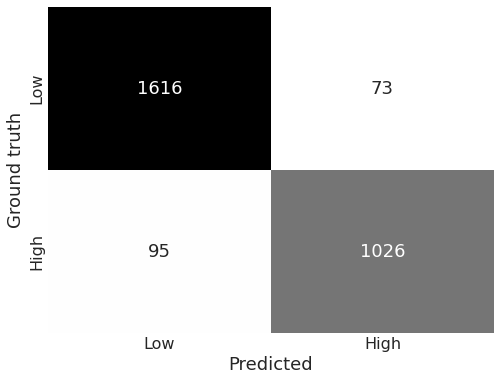

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Greys', 
            xticklabels=['Low', 'High'],
            yticklabels=['Low', 'High'],
            cbar=False, 
            annot_kws={"size": 18})

plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Ground truth', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.savefig(f'cm_nd_{name}.png', dpi=600, bbox_inches='tight')
plt.show()

In [17]:
import torch_geometric
import torch_geometric_temporal

print(f"torch_geometric=={torch_geometric.__version__}")
print(f"torch_geometric_temporal=={torch_geometric_temporal.__version__}")


torch_geometric==2.3.1
torch_geometric_temporal==0.54.0
